# Custering benign vs malignant tumore
* 569 samples, 30 features (e.g., radius, texture, smoothness)
* Dataset Link: http://https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
* Additional Information: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

## Step 1: Importing the dataset

In [1]:
bc_df <- read.csv("/kaggle/input/clustering-datasets/0-breast-cancer-wisconsin-diagnostic-dataset/breastcancerwisconsindiagnostic/wdbc.data")

## Step 2: Provide a summary

In [2]:
summary(bc_df)

    X842302               M                 X17.99           X10.38     
 Min.   :     8670   Length:568         Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869222   Class :character   1st Qu.:11.697   1st Qu.:16.18  
 Median :   906157   Mode  :character   Median :13.355   Median :18.86  
 Mean   : 30423820                      Mean   :14.120   Mean   :19.31  
 3rd Qu.:  8825022                      3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502                      Max.   :28.110   Max.   :39.28  
     X122.8           X1001           X0.1184           X0.2776       
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.14   1st Qu.: 420.2   1st Qu.:0.08629   1st Qu.:0.06481  
 Median : 86.21   Median : 548.8   Median :0.09587   Median :0.09252  
 Mean   : 91.91   Mean   : 654.3   Mean   :0.09632   Mean   :0.10404  
 3rd Qu.:103.88   3rd Qu.: 782.6   3rd Qu.:0.10530   3rd Qu.:0.13040  
 Max.   :188.50   Max.   :2501.0   Max.   :0.16340   Max.   :0.

## 3. Show the first 8 observations

In [3]:
head(bc_df, 8)

,X842302,M,X17.99,X10.38,X122.8,X1001,X0.1184,X0.2776,X0.3001,X0.1471,⋯,X25.38,X17.33,X184.6,X2019,X0.1622,X0.6656,X0.7119,X0.2654,X0.4601,X0.1189
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


## Step 4: Check for missing values and impute/delete if necessary

In [4]:
sum(is.na(bc_df))

[1] 0

## Step 5: Select only numerical variables and exclude the class label (if numeric)

### The structure of the data frame

In [5]:
str(bc_df)

'data.frame':	568 obs. of  32 variables:
 $ X842302  : int  842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 845636 ...
 $ M        : chr  "M" "M" "M" "M" ...
 $ X17.99   : num  20.6 19.7 11.4 20.3 12.4 ...
 $ X10.38   : num  17.8 21.2 20.4 14.3 15.7 ...
 $ X122.8   : num  132.9 130 77.6 135.1 82.6 ...
 $ X1001    : num  1326 1203 386 1297 477 ...
 $ X0.1184  : num  0.0847 0.1096 0.1425 0.1003 0.1278 ...
 $ X0.2776  : num  0.0786 0.1599 0.2839 0.1328 0.17 ...
 $ X0.3001  : num  0.0869 0.1974 0.2414 0.198 0.1578 ...
 $ X0.1471  : num  0.0702 0.1279 0.1052 0.1043 0.0809 ...
 $ X0.2419  : num  0.181 0.207 0.26 0.181 0.209 ...
 $ X0.07871 : num  0.0567 0.06 0.0974 0.0588 0.0761 ...
 $ X1.095   : num  0.543 0.746 0.496 0.757 0.335 ...
 $ X0.9053  : num  0.734 0.787 1.156 0.781 0.89 ...
 $ X8.589   : num  3.4 4.58 3.44 5.44 2.22 ...
 $ X153.4   : num  74.1 94 27.2 94.4 27.2 ...
 $ X0.006399: num  0.00522 0.00615 0.00911 0.01149 0.00751 ...
 $ X0.04904 : num  0.0131 0.

### Exclude the ID and the diagnosis columns

In [6]:
id_diagnosis <- subset(bc_df, select = c(X842302, M))
bc_df <- subset(bc_df, select = c(-X842302, -M))

In [7]:
str(bc_df)

'data.frame':	568 obs. of  30 variables:
 $ X17.99   : num  20.6 19.7 11.4 20.3 12.4 ...
 $ X10.38   : num  17.8 21.2 20.4 14.3 15.7 ...
 $ X122.8   : num  132.9 130 77.6 135.1 82.6 ...
 $ X1001    : num  1326 1203 386 1297 477 ...
 $ X0.1184  : num  0.0847 0.1096 0.1425 0.1003 0.1278 ...
 $ X0.2776  : num  0.0786 0.1599 0.2839 0.1328 0.17 ...
 $ X0.3001  : num  0.0869 0.1974 0.2414 0.198 0.1578 ...
 $ X0.1471  : num  0.0702 0.1279 0.1052 0.1043 0.0809 ...
 $ X0.2419  : num  0.181 0.207 0.26 0.181 0.209 ...
 $ X0.07871 : num  0.0567 0.06 0.0974 0.0588 0.0761 ...
 $ X1.095   : num  0.543 0.746 0.496 0.757 0.335 ...
 $ X0.9053  : num  0.734 0.787 1.156 0.781 0.89 ...
 $ X8.589   : num  3.4 4.58 3.44 5.44 2.22 ...
 $ X153.4   : num  74.1 94 27.2 94.4 27.2 ...
 $ X0.006399: num  0.00522 0.00615 0.00911 0.01149 0.00751 ...
 $ X0.04904 : num  0.0131 0.0401 0.0746 0.0246 0.0335 ...
 $ X0.05373 : num  0.0186 0.0383 0.0566 0.0569 0.0367 ...
 $ X0.01587 : num  0.0134 0.0206 0.0187 0.0188 0.0114 

## Step 6: Standardize the data

In [8]:
bc_df_std <- scale(bc_df, center = TRUE, scale = TRUE)

In [9]:
head(bc_df_std, 8)

,X17.99,X10.38,X122.8,X1001,X0.1184,X0.2776,X0.3001,X0.1471,X0.2419,X0.07871,⋯,X25.38,X17.33,X184.6,X2019,X0.1622,X0.6656,X0.7119,X0.2654,X0.4601,X0.1189
1,1.8304703,-0.3580115,1.68761850,1.9087096,-0.8245388,-0.48506996,-0.01926127,0.5547716,0.005310158,-0.8670525,⋯,1.8117525,-0.37154751,1.5437022,1.89738172,-0.3732153,-0.42767386,-0.1433461,1.0942976,-0.2402319,0.28504262
2,1.5807127,0.4534599,1.56820739,1.5592021,0.9453591,1.06701941,1.37428289,2.0497027,0.946033074,-0.3951172,⋯,1.5172885,-0.02636404,1.3555003,1.46240484,0.5295757,1.09222905,0.8605552,1.9647360,1.1628329,0.20511980
3,-0.7664412,0.2505920,-0.59025131,-0.7620394,3.2876616,3.43545507,1.92917831,1.4618812,2.878724511,4.9283702,⋯,-0.2785277,0.13157368,-0.2466058,-0.54747014,3.3957178,3.91481462,1.9976368,2.1861633,6.0808757,4.94609704
4,1.7510020,-1.1578238,1.77820624,1.8263054,0.2832492,0.54940161,1.38184965,1.4385755,-0.005671043,-0.5600103,⋯,1.3036983,-1.46897041,1.3465383,1.22642547,0.2228021,-0.31011937,0.6182342,0.7354327,-0.8677904,-0.39430135
5,-0.4741112,-0.8406971,-0.38478185,-0.5034606,2.2411009,1.25993231,0.87487702,0.8323684,1.011920282,1.8991708,⋯,-0.1624010,-0.31618789,-0.1112797,-0.24122528,2.0502964,1.73366769,1.2697122,0.9125746,1.7676302,2.24870189
6,1.1720184,0.1573195,1.13997446,1.0960336,-0.1204242,0.09481477,0.30610922,0.6539503,-0.060577050,-0.7604406,⋯,1.3742038,0.32044765,1.3764116,1.28101771,0.5208107,0.02593314,0.5143823,1.2042477,0.2686433,-0.01133784
7,-0.1165037,0.3555237,-0.07060711,-0.2170349,1.6074689,1.15488073,0.06599084,0.2875330,1.410903931,1.6688891,⋯,0.1673158,0.39860240,0.1038082,0.03244034,1.4498966,0.73253786,-0.0173776,0.6300639,0.4848746,1.73253368
8,-0.3180127,0.5863733,-0.18178297,-0.3821275,2.2055036,1.70305898,1.22925341,1.1596840,1.974605600,1.5807566,⋯,-0.1582536,0.82031238,-0.0276344,-0.24527567,1.6646381,1.83077792,1.2865401,1.3997146,2.4065693,1.29406821


## Step 7: Find the optimal number of clusters using the Elbow Method

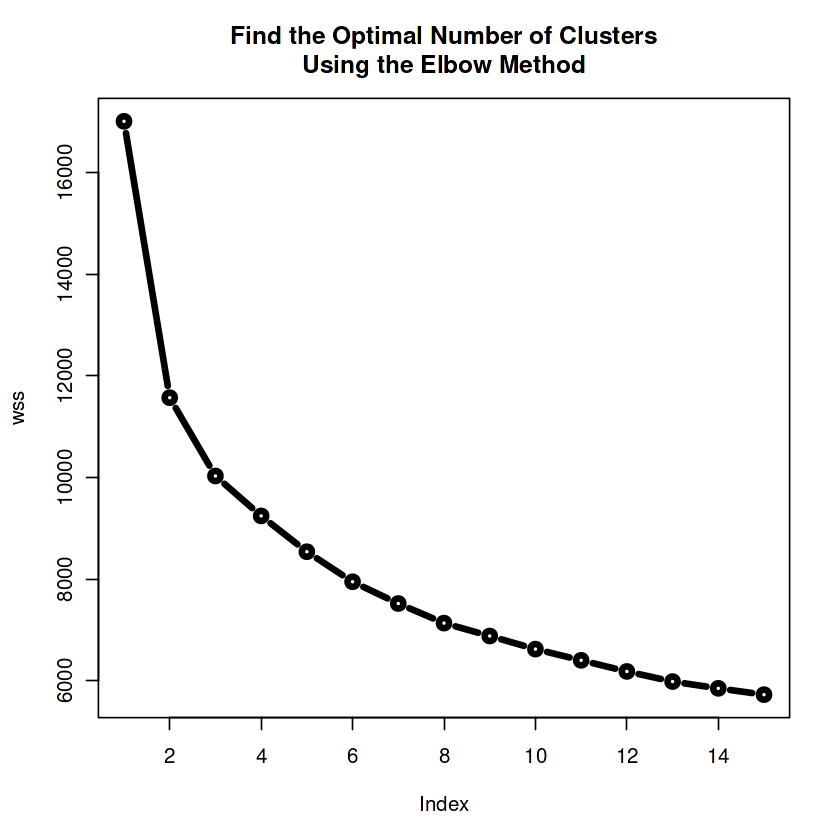

In [10]:
wss <- numeric(15)
for(i in 1:15) {
    wss[i] <- sum(kmeans(bc_df_std,
                         centers = i,
                        nstart = 25)$withinss)
}
plot(wss, type = "b", lwd = 4,
    main = "Find the Optimal Number of Clusters\nUsing the Elbow Method")

## Step 8: Apply Hierarchical Clustering & k-means with the same number of clusters

### Hierarchical Clustering

In [11]:
dist_matrix <- dist(bc_df_std, method = "euclidean")
hc <- hclust(dist_matrix, method = "ward.D2")
bc_df$ClusterHC <- as.factor(cutree(hc, k = 2))

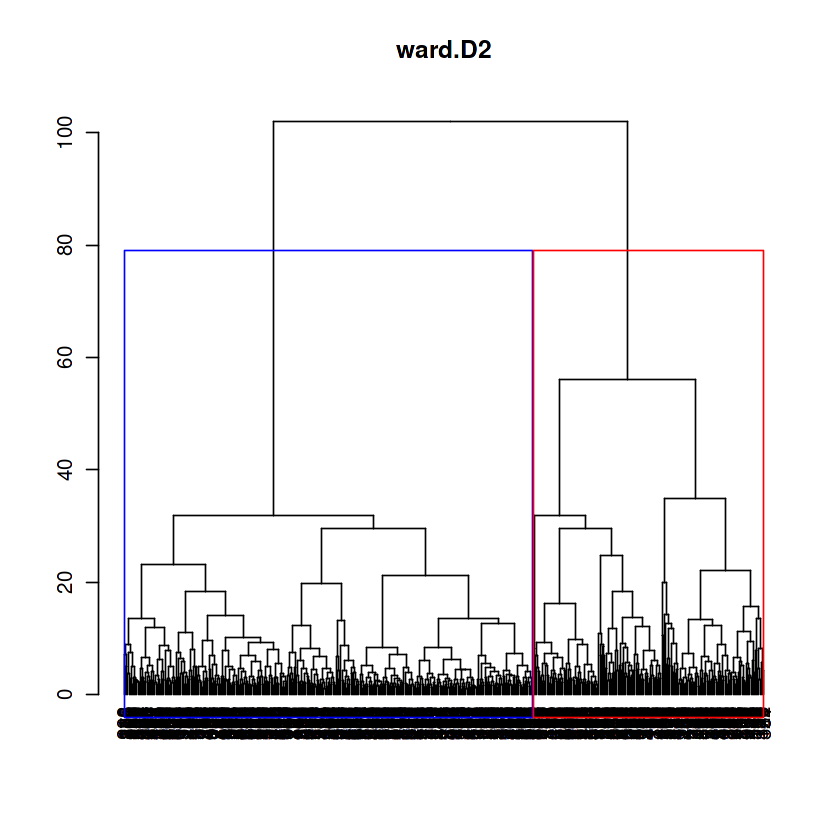

In [12]:
plot(as.dendrogram(hc), main = "ward.D2")
rect.hclust(hc, k = 2, border = c("blue", "red"))

### K-means Clustering

In [13]:
KM_result <- kmeans(bc_df_std, centers = 2, nstart = 25)
bc_df$ClusterKM <- as.factor(KM_result$cluster)

## Step 9: Perform PCA visualization

In [14]:
pca_result <- princomp(bc_df_std)

In [15]:
library(factoextra)

Loading required package: ggplot2



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



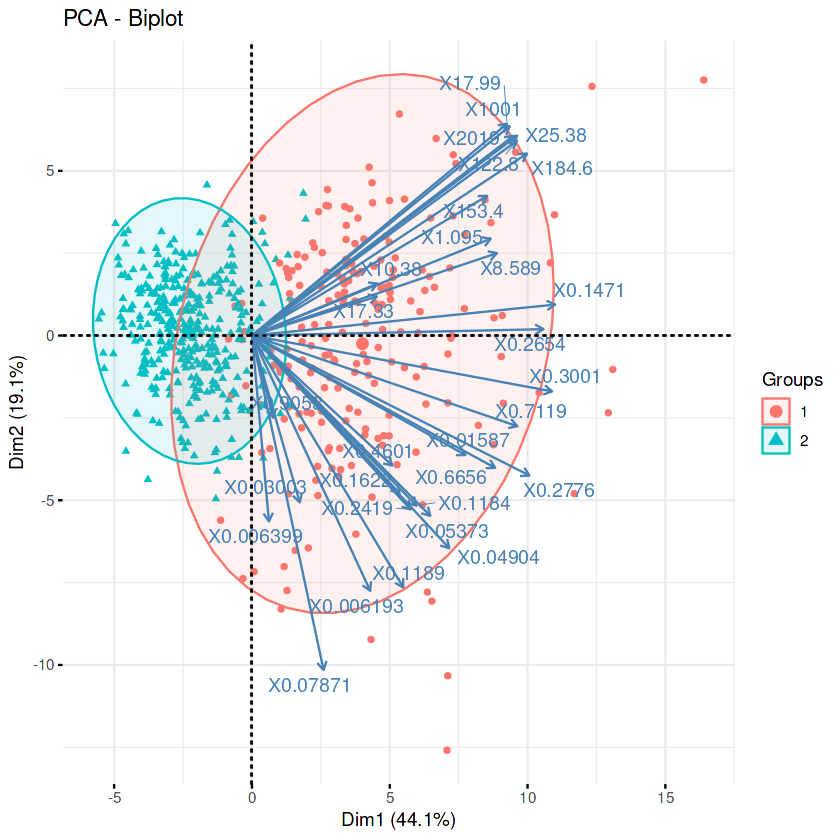

In [16]:
fviz_pca_biplot(
  pca_result,
  geom = "point",
  repel = TRUE,
  habillage = bc_df$ClusterHC,
  addEllipses = TRUE,
  ellipse.level = 0.95,
  title = "PCA - Biplot"
)

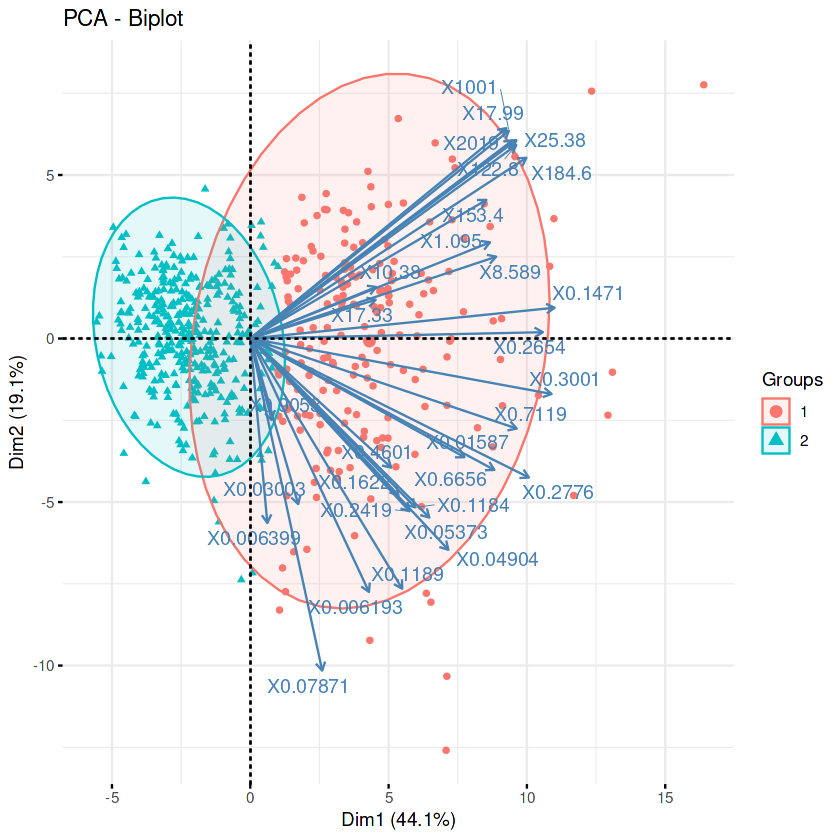

In [17]:
fviz_pca_biplot(
  pca_result,
  geom = "point",
  repel = TRUE,
  habillage = bc_df$ClusterKM,
  addEllipses = TRUE,
  ellipse.level = 0.95,
  title = "PCA - Biplot"
)

## Step 10: Compare clustering results using table()

In [18]:
contingency_table <- table(
    HC <- bc_df$ClusterHC,
    KM <- bc_df$ClusterKM
)

contingency_table

   
      1   2
  1 187  18
  2   6 357

In [19]:
id_diagnosis[, 2] <- ifelse(id_diagnosis[, 2] == "M", 1, 2)

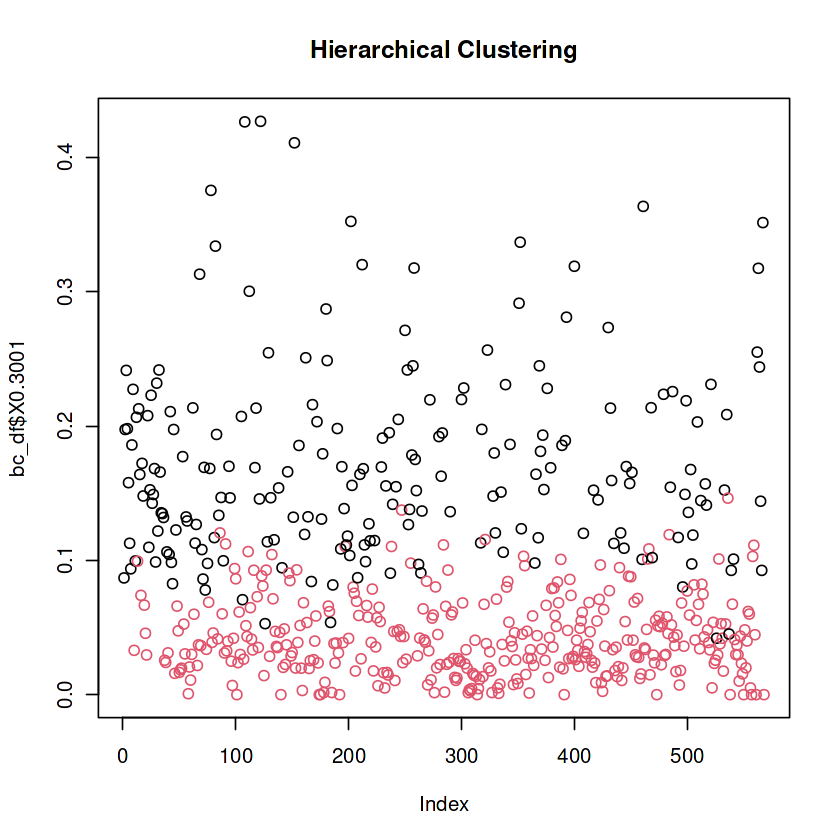

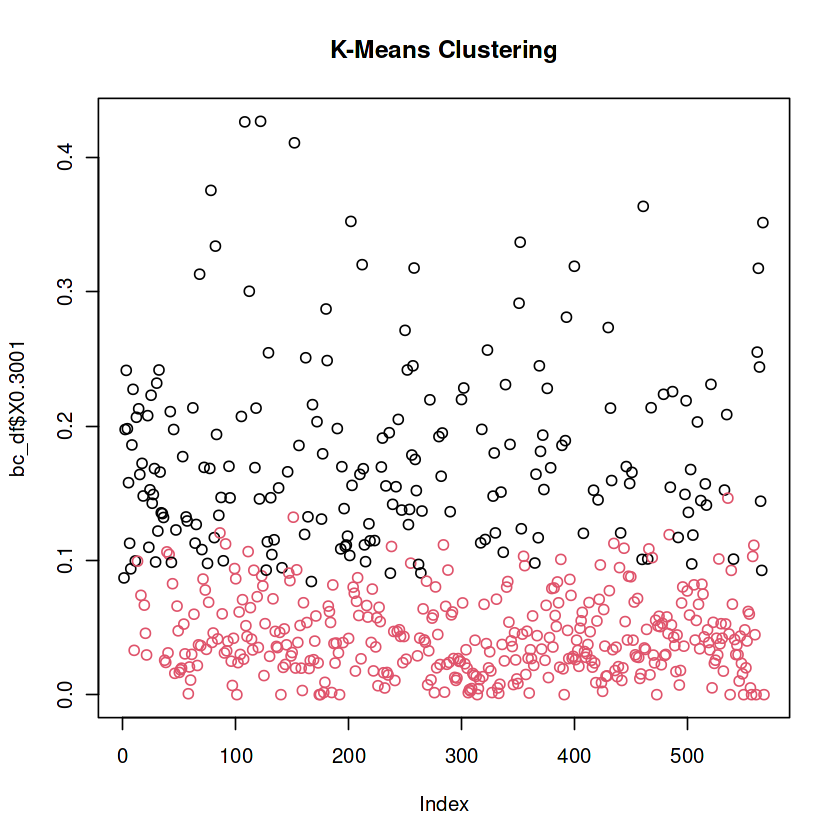

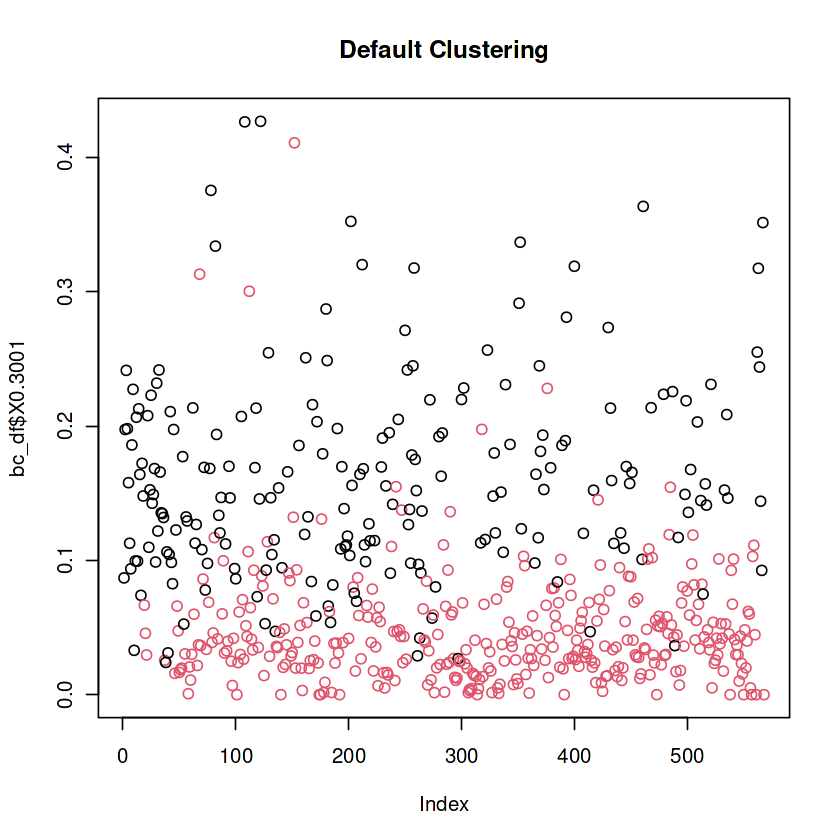

In [20]:
plot(bc_df$X0.3001, col = as.integer(bc_df$ClusterHC),
    main = "Hierarchical Clustering")
plot(bc_df$X0.3001, col = as.integer(bc_df$ClusterKM),
    main = "K-Means Clustering")
plot(bc_df$X0.3001, col = as.integer(id_diagnosis[, 2]),
    main = "Default Clustering")